# Reading raster data  with rasterio, georaster, folium and xarray in Python

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import xarray as xr

Reading raster data in python can be done through different libraries. The best of them is rasterio, a great library specialized for reading and writing raster data.

I've created an image from google earth pro and converted to tif with paint software. The image is district of Malika, located in Dakar. 

## Reading simple tif image format with rasterio

In [6]:
data = rasterio.open('D:\Research\PROJECT\pyexeriences\Geospatial experiences\Raster data analysis\data\district_malika.tif')

d:\programm files\python 3 8 6\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [7]:
data

<open DatasetReader name='D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika.tif' mode='r'>

In [100]:
rasterio.Env()

In [83]:
from rasterio.plot import show

d:\programm files\python 3 8 6\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


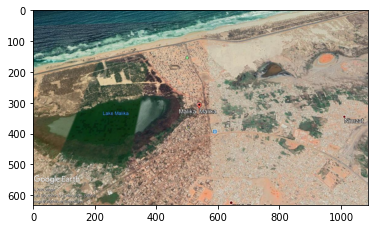

<AxesSubplot:>

In [101]:
fp = r'D:\Research\PROJECT\pyexeriences\Geospatial experiences\Raster data analysis\data\district_malika.tif'
#fp = r'GeoTiff_Image.tif'
img = rasterio.open(fp)
show(img)

In [85]:
first_band = img.read(1)

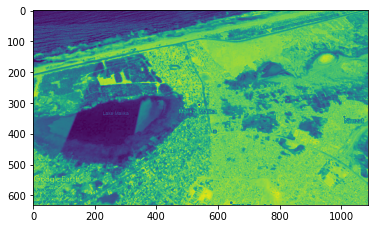

<AxesSubplot:>

In [86]:
show(first_band)

In [88]:
# No. of Bands and Image resolution
print(img.count); # Number of bands
print(img.height, img.width); # image resolution

4
631 1087


There are 4 bands in our image data, we have extracted the first band already above 'first_band'

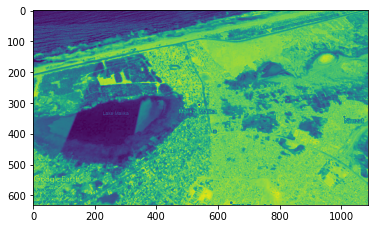

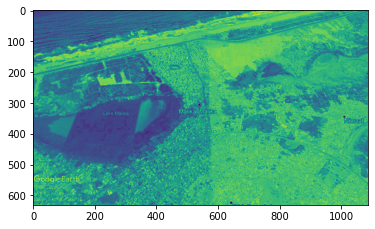

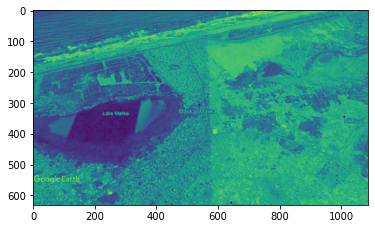

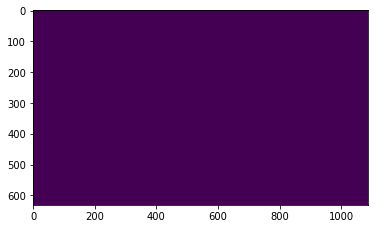

In [102]:
for i in img.read():
    show(i)

In [103]:
img.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1087, 'height': 631, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

In [90]:
print(img.crs)

None


In [114]:
# crs = CRS.from_epsg(3005)

## Using Georaster

In [115]:
import georaster
print(georaster.__file__)

d:\programm files\python 3 8 6\lib\site-packages\georaster\__init__.py


In [117]:
# Visualizing image and having more than one band
geo_img = georaster.SingleBandRaster(fp)


d:\programm files\python 3 8 6\lib\site-packages\georaster\georaster.py:208: UserWarning: Warning : No georeferencing information associated to image!
  warn('Warning : No georeferencing information associated to image!')


In [118]:
geo_img

In [122]:
geo_img.r # the raster in [height, width, band] format 

array([[ 10,  10,  12, ..., 185, 193, 193],
       [ 19,  19,  19, ..., 180, 193, 195],
       [ 24,  23,  23, ..., 194, 198, 198],
       ...,
       [221, 214, 210, ..., 189, 196, 202],
       [222, 219, 217, ..., 181, 190, 202],
       [209, 212, 214, ..., 181, 189, 204]], dtype=uint8)

In [124]:
print(geo_img.nx);
print(geo_img.ny)

1087
631


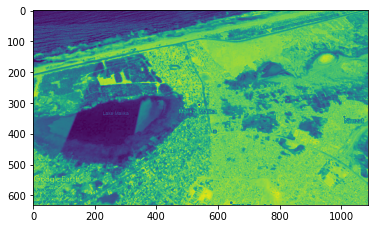

In [126]:
plt.imshow(geo_img.r)

In [129]:
geo_img.coordinates()

(array([[5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03],
        [5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03],
        [5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03],
        ...,
        [5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03],
        [5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03],
        [5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.0845e+03, 1.0855e+03,
         1.0865e+03]]),
 array([[5.000e-01, 5.000e-01, 5.000e-01, ..., 5.000e-01, 5.000e-01,
         5.000e-01],
        [1.500e+00, 1.500e+00, 1.500e+00, ..., 1.500e+00, 1.500e+00,
         1.500e+00],
        [2.500e+00, 2.500e+00, 2.500e+00, ..., 2.500e+00, 2.500e+00,
         2.500e+00],
        ...,
        [6.285e+02, 6.285e+02, 6.285e+02, ..., 6.285e+02, 6.285e+02,
         6.285e+02],
        [6.295e+02, 6.295e+02, 6.295

## Using GDAL to read raster file

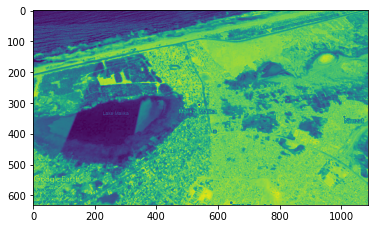

In [140]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('D:\Research\PROJECT\pyexeriences\Geospatial experiences\Raster data analysis\data\malika.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [142]:
dataset.GetDescription()

'D:\\Research\\PROJECT\\pyexeriences\\Geospatial experiences\\Raster data analysis\\data\\malika.tif'

In [146]:
dataset.GetMetadata()

{'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)',
 'TIFFTAG_XRESOLUTION': '95.987',
 'TIFFTAG_YRESOLUTION': '95.987'}

In [149]:
# Number of bands
dataset.RasterCount

3

In [150]:
# Resolution of image
print(dataset.RasterXSize, dataset.RasterYSize)

1087 631


In [156]:
dataset.GetGeoTransform()

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [166]:
import ee 
import folium
import geehydro
from datetime import datetime as dt
from IPython.display import Image

In [169]:
# initialize the connection to the server
ee.Initialize()

In [170]:
# the National Park of Niokolo-koba Land in Senegal.
niokolokoba_map = folium.Map(location=[12.994922111236805, -12.936270800693812], zoom_start=10)
niokolokoba_map

With ee, you can have access to the entire Landsat 8 collection

In [171]:
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

In [176]:
# setting the Area of Interest (AOI)
#n_aoi = ee.Geometry.Rectangle([12.997600267904911, -12.939015468157955])

In [177]:
image = ee.Image('srtm90_v4')

In [178]:
image

In [181]:
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'elevation',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [432000, 144000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.000833333333333, 0, -180, 0, -0.000833333333333, 60]}],
 'version': 1494271934303000.0,
 'id': 'srtm90_v4',
 'properties': {'system:time_start': 950227200000,
  'system:time_end': 951177600000,
  'system:asset_size': 18827626666}}

## Reading raster data with xarry library

In [13]:
array_data = xr.open_rasterio(data).squeeze()


In [14]:
array_data

<xarray.DataArray (band: 4, y: 631, x: 1087)>
[2743588 values with dtype=uint8]
Coordinates:
  * band     (band) int32 1 2 3 4
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 ... 626.5 627.5 628.5 629.5 630.5
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 1.084e+03 1.086e+03 1.086e+03
Attributes:
    transform:               (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:                     (1.0, -1.0)
    is_tiled:                0
    nodatavals:              (nan, nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0, 0.0)
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_XRESOLUTION:     96.012001
    TIFFTAG_YRESOLUTION:     96.012001

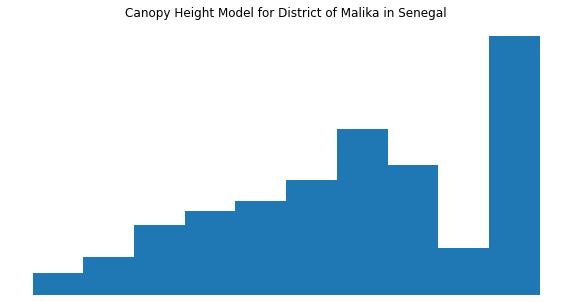

In [16]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
array_data.plot()
ax.set(title="Canopy Height Model for District of Malika in Senegal")
ax.set_axis_off()
plt.show()

(array([ 59812., 100699., 187885., 224087., 250702., 306787., 443612.,
        349185., 126308., 694511.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

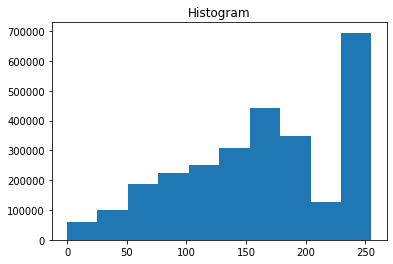

In [17]:
# Plot a histogram to explore the range of raster values data
array_data.plot.hist()

In [19]:
print('Our array minimum value: ', np.nanmin(array_data))
print('Our array max value: ', np.nanmax(array_data))


Our array minimum value:  0
Our array max value:  255


In [27]:
# Check the coordinates
print("The coordinates are", array_data.coords)
print("The no data value is", array_data.nodatavals)

The coordinates are Coordinates:
  * band     (band) int32 1 2 3 4
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 ... 626.5 627.5 628.5 629.5 630.5
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 1.084e+03 1.086e+03 1.086e+03
The no data value is (nan, nan, nan, nan)


In [29]:
# Convert array data to dataframe 
df = array_data.to_dataframe('malika_array_data')

In [30]:
df.head()

malika_array_data
band y   x                     
1    0.5 0.5                 10
         1.5                 10
         2.5                 12
         3.5                 14
         4.5                 17

In [31]:
df.columns

Index(['malika_array_data'], dtype='object')

<AxesSubplot:xlabel='band,y,x'>

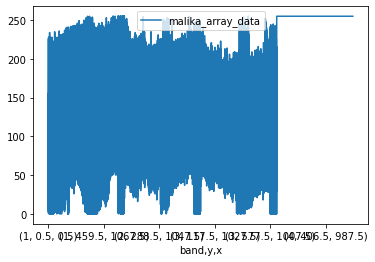

In [32]:
df.plot()